In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:

#Importa os datasets e retira a primeira coluna do train
dt_frame_enem_2016_train = pd.read_csv('/media/deive/Arquivos/Git Files/DesafiosCodeNation/datascience/testfiles/train_menos_variáveis.csv')
dt_frame_enem_2016_train = dt_frame_enem_2016_train.drop(['Unnamed: 0'], axis = 1)
dt_frame_enem_2016_test = pd.read_csv('/media/deive/Arquivos/Git Files/DesafiosCodeNation/datascience/testfiles/test.csv')

In [4]:
#Verifica o número de nulos no dataframe
dt_frame_enem_2016_train.isnull().sum()

NU_INSCRICAO          0
NU_IDADE              0
TP_SEXO               0
TP_ESTADO_CIVIL     528
TP_COR_RACA           0
TP_ST_CONCLUSAO       0
TP_ANO_CONCLUIU       0
TP_ESCOLA             0
TP_ENSINO          9448
NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_MT         3597
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
NU_NOTA_REDACAO    3597
dtype: int64

In [5]:
#Limpa o casos nulos de todas as notas
dt_frame_enem_2016_train = dt_frame_enem_2016_train.dropna(subset=['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH',])

In [6]:
dt_frame_enem_2016_test = dt_frame_enem_2016_test.dropna(subset=['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC'])

In [7]:
#Verifica o número de nulos no dataframe
dt_frame_enem_2016_train.isnull().sum()
dt_frame_enem_2016_test.isnull().sum()

NU_INSCRICAO                 0
CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 2114
IN_TREINEIRO                 0
TP_DEPENDENCIA_ADM_ESC    2114
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
CO_PROVA_CN                  0
CO_PROVA_CH                  0
CO_PROVA_LC                  0
CO_PROVA_MT                  0
NU_NOTA_CN                   0
NU_NOTA_CH                   0
NU_NOTA_LC                   0
TP_LINGUA                    0
TP_STATU

In [8]:
#Retira todos os alunos que tiraram zero como nota em alguma das provas
dt_frame_enem_2016_train = dt_frame_enem_2016_train.loc[dt_frame_enem_2016_train['NU_NOTA_CN']!=0]
dt_frame_enem_2016_train = dt_frame_enem_2016_train.loc[dt_frame_enem_2016_train['NU_NOTA_CH']!=0]
dt_frame_enem_2016_train = dt_frame_enem_2016_train.loc[dt_frame_enem_2016_train['NU_NOTA_LC']!=0]
dt_frame_enem_2016_train = dt_frame_enem_2016_train.loc[dt_frame_enem_2016_train['NU_NOTA_MT']!=0]
dt_frame_enem_2016_train = dt_frame_enem_2016_train.loc[dt_frame_enem_2016_train['NU_NOTA_COMP1']!=0]
dt_frame_enem_2016_train = dt_frame_enem_2016_train.loc[dt_frame_enem_2016_train['NU_NOTA_COMP2']!=0]
dt_frame_enem_2016_train = dt_frame_enem_2016_train.loc[dt_frame_enem_2016_train['NU_NOTA_COMP3']!=0]
dt_frame_enem_2016_train = dt_frame_enem_2016_train.loc[dt_frame_enem_2016_train['NU_NOTA_COMP4']!=0]
dt_frame_enem_2016_train = dt_frame_enem_2016_train.loc[dt_frame_enem_2016_train['NU_NOTA_COMP5']!=0]
dt_frame_enem_2016_train = dt_frame_enem_2016_train.loc[dt_frame_enem_2016_train['NU_NOTA_REDACAO']!=0]
#Finalizada a limpeza dos dados

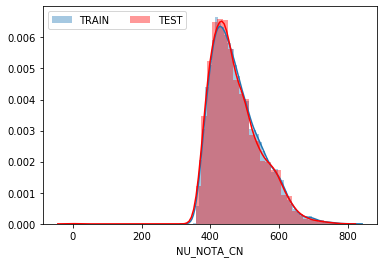

In [9]:
#Criação de gráficos para verificar a distribuição
x_cn_dist_train = dt_frame_enem_2016_train['NU_NOTA_CN']
x_cn_dist_test = dt_frame_enem_2016_test['NU_NOTA_CN']
sns.distplot(x_cn_dist_train)
sns.distplot(x_cn_dist_test,color='red')
plt.legend(labels=['TRAIN','TEST'],ncol=2, loc='upper left');

In [10]:
#Definição do nome das variáveis que serão utilizadas
variaveis_train = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']
variaveis_test = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']

In [11]:
#Criando as features que serão usadas na criação do modelo
y_enem_mt_train = dt_frame_enem_2016_train['NU_NOTA_MT']
x_enem_train = dt_frame_enem_2016_train[variaveis_train]
x_enem_test = dt_frame_enem_2016_test[variaveis_test]

In [12]:
#Criação do modelo e treinamento
modelo_mt = LinearRegression()
modelo_mt.fit(x_enem_train,y_enem_mt_train)
modelo_mt.intercept_
modelo_mt.coef_
modelo_mt.score(x_enem_train, y_enem_mt_train)

0.40802203427750205

In [13]:
#Previsão das notas de matemática
previsao_mt = modelo_mt.predict(x_enem_test)

In [14]:
print(previsao_mt)

[436.24276139 432.68419196 580.81505677 ... 460.77757509 621.91479025
 443.14131833]


In [15]:
#Atualização do dataframe com a nota de matemática
dt_frame_enem_2016_test['NU_NOTA_MT'] = previsao_mt

In [16]:
modelo_mt.score(x_enem_train, y_enem_mt_train)

0.40802203427750205

In [17]:
#Criação do dataframe de resposta com o número de inscrição e nota de matemática
answer = dt_frame_enem_2016_test.loc[:,['NU_INSCRICAO','NU_NOTA_MT']]

In [18]:
#Exportação do dataframe como arquivo csv
answer_csv = answer.to_csv('answerII.csv')